In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merged_df_all.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,0,0,2019-01-01 01:00:00.000,10.926,33.6881,0.979103,9.014
1,1,1,2019-01-01 02:00:00.000,9.919,37.2619,0.979566,9.428
2,2,2,2019-01-01 03:00:00.005,8.567,30.5029,0.979937,8.700
3,3,3,2019-01-01 04:00:00.010,7.877,28.4192,0.980053,8.481
4,4,4,2019-01-01 05:00:00.015,7.259,27.3703,0.979867,8.383
...,...,...,...,...,...,...,...
43818,43818,8755,2023-12-31 19:00:00,11.713,30.4221,0.985015,8.703
43819,43819,8756,2023-12-31 20:00:00,12.115,32.0366,0.985244,8.854
43820,43820,8757,2023-12-31 21:00:00,11.856,36.3990,0.985639,9.333
43821,43821,8758,2023-12-31 22:00:00,10.761,37.7404,0.986212,9.457


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'DateTime', 'Air temperature | (°C)',
       'Power generated by system | (MW)', 'Pressure | (atm)',
       'Wind speed | (m/s)'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [6]:
df

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,2019-01-01 01:00:00.000,10.926,33.6881,0.979103,9.014
1,2019-01-01 02:00:00.000,9.919,37.2619,0.979566,9.428
2,2019-01-01 03:00:00.005,8.567,30.5029,0.979937,8.700
3,2019-01-01 04:00:00.010,7.877,28.4192,0.980053,8.481
4,2019-01-01 05:00:00.015,7.259,27.3703,0.979867,8.383
...,...,...,...,...,...
43818,2023-12-31 19:00:00,11.713,30.4221,0.985015,8.703
43819,2023-12-31 20:00:00,12.115,32.0366,0.985244,8.854
43820,2023-12-31 21:00:00,11.856,36.3990,0.985639,9.333
43821,2023-12-31 22:00:00,10.761,37.7404,0.986212,9.457


In [7]:
df.columns

Index(['DateTime', 'Air temperature | (°C)',
       'Power generated by system | (MW)', 'Pressure | (atm)',
       'Wind speed | (m/s)'],
      dtype='object')

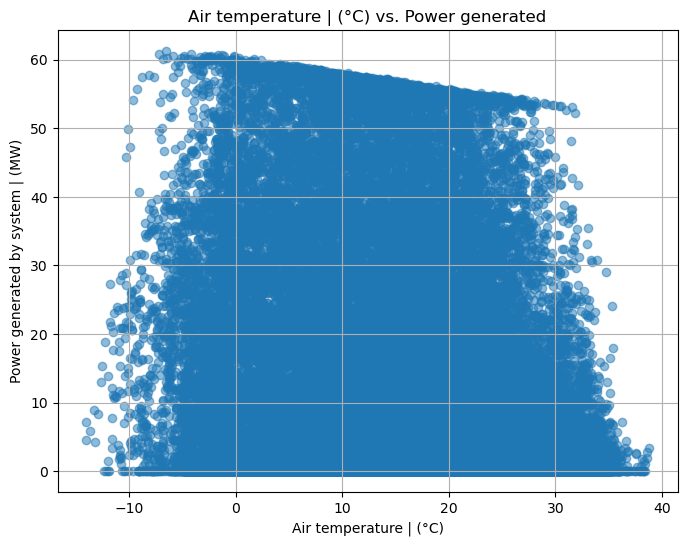

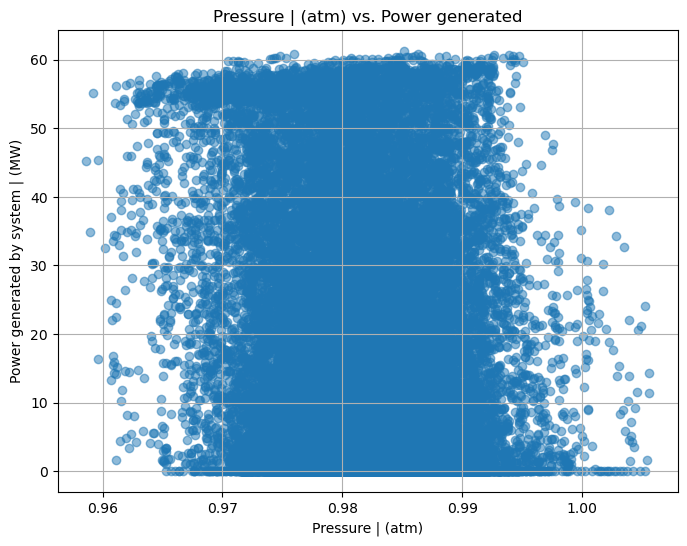

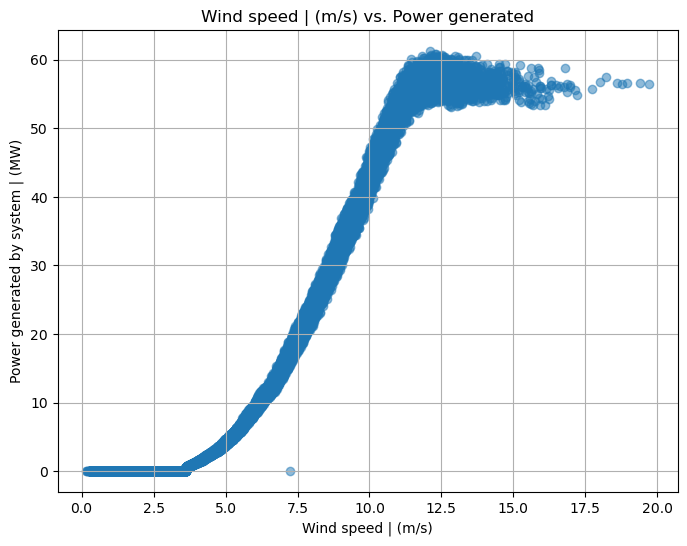

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of columns to plot against 'Power generated by system | (MW)'
columns_to_plot = ['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']

# Plotting each column against 'Power generated by system | (MW)'
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['Power generated by system | (MW)'], alpha=0.5)
    plt.title(f'{column} vs. Power generated')
    plt.xlabel(column)
    plt.ylabel('Power generated by system | (MW)')
    plt.grid(True)
    plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


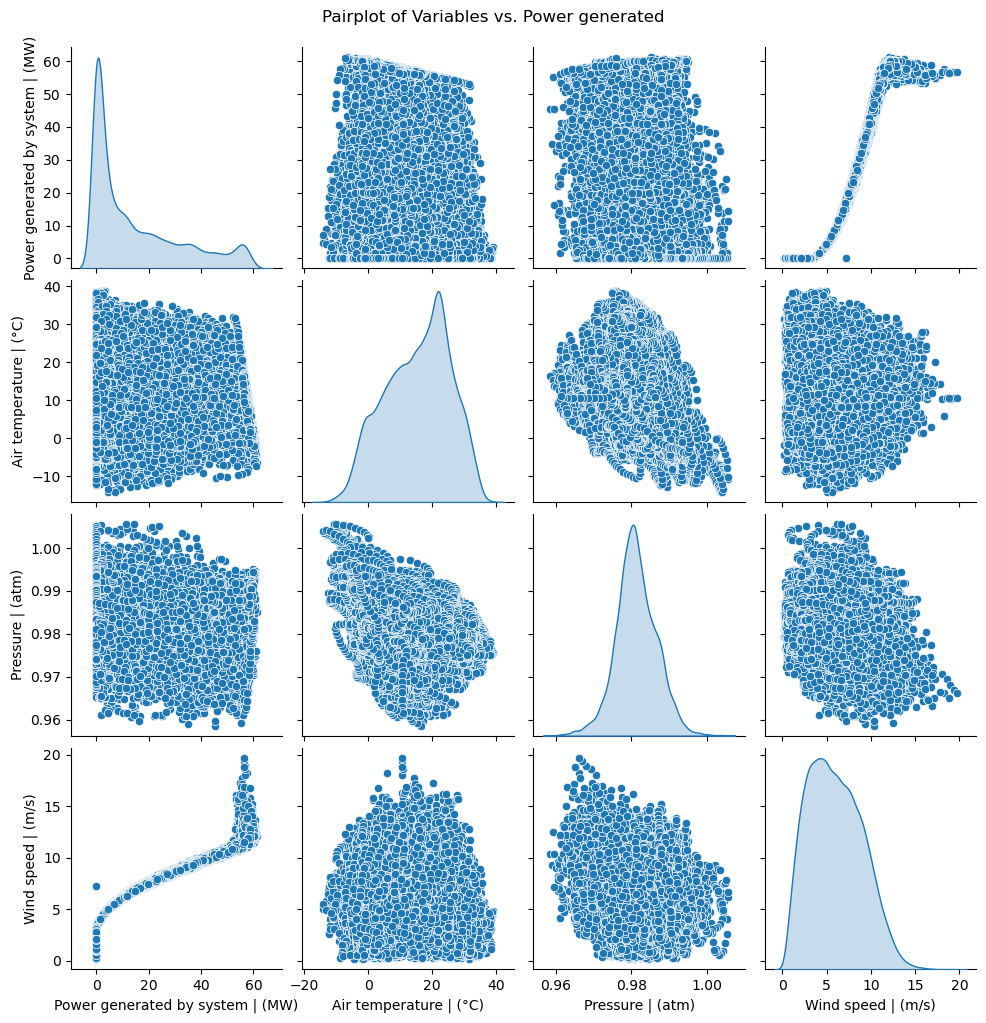

In [9]:
import seaborn as sns

# List of columns to plot against 'Power generated by system | (MW)'
columns_to_plot = ['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']

# Combine the power generated column with the columns to plot into a new DataFrame
df_plot = df[['Power generated by system | (MW)'] + columns_to_plot]

# Create a pairplot
sns.pairplot(df_plot, diag_kind='kde')
plt.suptitle('Pairplot of Variables vs. Power generated', y=1.02)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


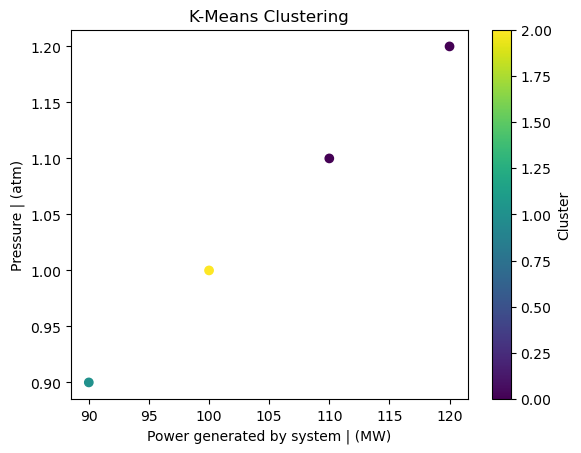

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = {
    'Power generated by system | (MW)': [100, 110, 90, 120],
    'Pressure | (atm)': [1, 1.1, 0.9, 1.2],
}

df = pd.DataFrame(data)

# Selecting the features for clustering
X = df[['Pressure | (atm)']]

# Performing k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(df['Power generated by system | (MW)'], df['Pressure | (atm)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Power generated by system | (MW)')
plt.ylabel('Pressure | (atm)')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [11]:
df1 = pd.read_csv('merged_df_all.csv')

In [12]:
df1

,Unnamed: 0.1,Unnamed: 0,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,0,0,2019-01-01 01:00:00.000,10.926,33.6881,0.979103,9.014
1,1,1,2019-01-01 02:00:00.000,9.919,37.2619,0.979566,9.428
2,2,2,2019-01-01 03:00:00.005,8.567,30.5029,0.979937,8.700
3,3,3,2019-01-01 04:00:00.010,7.877,28.4192,0.980053,8.481
4,4,4,2019-01-01 05:00:00.015,7.259,27.3703,0.979867,8.383
...,...,...,...,...,...,...,...
43818,43818,8755,2023-12-31 19:00:00,11.713,30.4221,0.985015,8.703
43819,43819,8756,2023-12-31 20:00:00,12.115,32.0366,0.985244,8.854
43820,43820,8757,2023-12-31 21:00:00,11.856,36.3990,0.985639,9.333
43821,43821,8758,2023-12-31 22:00:00,10.761,37.7404,0.986212,9.457


In [13]:
df1.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [14]:
df1.columns

Index(['DateTime', 'Air temperature | (°C)',
       'Power generated by system | (MW)', 'Pressure | (atm)',
       'Wind speed | (m/s)'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df1[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]
y = df1['Power generated by system | (MW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 0.08492516228096765


In [16]:
mon_3 = pd.read_excel('wind_power_gen_3months_validation_data.xlsx')
mon_3

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2024-01-01 00:00:00,6.609,0.988077,10.868,53.18100
1,2024-01-01 01:00:00,5.257,0.988969,10.679,51.90830
2,2024-01-01 02:00:00,4.374,0.989708,11.200,56.35400
3,2024-01-01 03:00:00,2.913,0.990171,10.962,54.93680
4,2024-01-01 04:00:00,1.152,0.990264,11.307,57.74310
...,...,...,...,...,...
2179,2024-03-31 19:00:00,27.835,0.973886,4.855,3.49390
2180,2024-03-31 20:00:00,28.390,0.973506,6.066,8.96133
2181,2024-03-31 21:00:00,28.487,0.973034,7.075,15.10510
2182,2024-03-31 22:00:00,28.555,0.972540,6.892,13.70680


In [17]:
X_val = mon_3[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]
y_pred_val = model.predict(X_val)
print(y_pred_val)

[53.088237 51.467859 56.16945  ... 15.168383 13.670668 12.860713]


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(mon_3['Power generated by system | (MW)'], y_pred_val)
print(f"R2 score: {r2}")

R2 score: 0.9999060879383102


In [19]:
y_pred_val

array([53.088237, 51.467859, 56.16945 , ..., 15.168383, 13.670668,
       12.860713])

In [20]:
df1

,DateTime,Air temperature | (°C),Power generated by system | (MW),Pressure | (atm),Wind speed | (m/s)
0,2019-01-01 01:00:00.000,10.926,33.6881,0.979103,9.014
1,2019-01-01 02:00:00.000,9.919,37.2619,0.979566,9.428
2,2019-01-01 03:00:00.005,8.567,30.5029,0.979937,8.700
3,2019-01-01 04:00:00.010,7.877,28.4192,0.980053,8.481
4,2019-01-01 05:00:00.015,7.259,27.3703,0.979867,8.383
...,...,...,...,...,...
43818,2023-12-31 19:00:00,11.713,30.4221,0.985015,8.703
43819,2023-12-31 20:00:00,12.115,32.0366,0.985244,8.854
43820,2023-12-31 21:00:00,11.856,36.3990,0.985639,9.333
43821,2023-12-31 22:00:00,10.761,37.7404,0.986212,9.457


In [21]:
predicted_power_df = pd.DataFrame({'predicted power': y_pred_val})

predicted_power_df

,predicted power
0,53.088237
1,51.467859
2,56.169450
3,54.692178
4,57.639987
...,...
2179,3.490164
2180,8.992821
2181,15.168383
2182,13.670668


In [22]:
y_pred_val

array([53.088237, 51.467859, 56.16945 , ..., 15.168383, 13.670668,
       12.860713])

In [29]:
predicted_power_df['total_power'] = predicted_power_df['predicted power']
predicted_power_df['date'] = mon_3['DateTime']

# Calculate the power taken by each node
predicted_power_df['Node 1 Power (MW)'] = predicted_power_df['total_power'] * 0.20
predicted_power_df['Node 2 Power (MW)'] = predicted_power_df['total_power'] * 0.45
predicted_power_df['Node 3 Power (MW)'] = predicted_power_df['total_power'] * 0.35

# Print the updated DataFrame
predicted_power_df

,predicted power,total_power,date,Node 1 Power (MW),Node 2 Power (MW),Node 3 Power (MW)
0,53.088237,53.088237,2024-01-01 00:00:00,10.617647,23.889707,18.580883
1,51.467859,51.467859,2024-01-01 01:00:00,10.293572,23.160537,18.013751
2,56.169450,56.169450,2024-01-01 02:00:00,11.233890,25.276253,19.659308
3,54.692178,54.692178,2024-01-01 03:00:00,10.938436,24.611480,19.142262
4,57.639987,57.639987,2024-01-01 04:00:00,11.527997,25.937994,20.173995
...,...,...,...,...,...,...
2179,3.490164,3.490164,2024-03-31 19:00:00,0.698033,1.570574,1.221558
2180,8.992821,8.992821,2024-03-31 20:00:00,1.798564,4.046769,3.147487
2181,15.168383,15.168383,2024-03-31 21:00:00,3.033677,6.825772,5.308934
2182,13.670668,13.670668,2024-03-31 22:00:00,2.734134,6.151801,4.784734


In [24]:
# Assuming predicted_power_df is your DataFrame
predicted_power_df.to_csv('predicted_power.csv', index=False)

In [30]:

predicted_power_df.to_csv('predicted_power_df3.csv')

# files.download('predicted_power_df.csv')